# Initialization and Loading Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
fpath = '/Users/kristansimbulan/Downloads/Crimes_-_2001_to_Present_20240328.csv'
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


# Data Preparation

In [3]:
# Convert the 'Date' column to datetime
df1 = df.copy()
df1['Date'] = pd.to_datetime(df['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8026833 entries, 0 to 8026832
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [6]:
# Set 'Date' to index
df_dateindex = df1.set_index("Date")
df_dateindex.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [8]:
# Resample the dataframe
df_res = df_dateindex.groupby('Description').resample('D').sum(numeric_only = True)
df_res.head(10)

ID  Arrest  Domestic  Beat  District  Ward  \
Description    Date                                                          
$300 AND UNDER 2001-05-10  1521929       0         0  1932      19.0   0.0   
               2001-05-11        0       0         0     0       0.0   0.0   
               2001-05-12        0       0         0     0       0.0   0.0   
               2001-05-13        0       0         0     0       0.0   0.0   
               2001-05-14        0       0         0     0       0.0   0.0   
               2001-05-15        0       0         0     0       0.0   0.0   
               2001-05-16        0       0         0     0       0.0   0.0   
               2001-05-17        0       0         0     0       0.0   0.0   
               2001-05-18        0       0         0     0       0.0   0.0   
               2001-05-19        0       0         0     0       0.0   0.0   

                           Community Area  X Coordinate  Y Coordinate  Year  \
Description    Date                                                           
$300 AND UNDER 2001-05-10             0.0     1170123.0     1921138.0  2001   
               2001-05-11             0.0           0.0           0.0     0   
               2001-05-12             0.0           0.0           0.0     0   
               2001-05-13             0.0           0.0           0.0     0   
               2001-05-14             0.0           0.0           0.0     0   
               2001-05-15             0.0           0.0           0.0     0   
               2001-05-16             0.0           0.0           0.0     0   
               2001-05-17             0.0           0.0           0.0     0   
               2001-05-18             0.0           0.0           0.0     0   
               2001-05-19             0.0           0.0           0.0     0   

                            Latitude  Longitude  
Description    Date                              
$300 AND UNDER 2001-05-10  41.939099 -87.650159  
               2001-05-11   0.000000   0.000000  
               2001-05-12   0.000000   0.000000  
               2001-05-13   0.000000   0.000000  
               2001-05-14   0.000000   0.000000  
               2001-05-15   0.000000   0.000000  
               2001-05-16   0.000000   0.000000  
               2001-05-17   0.000000   0.000000  
               2001-05-18   0.000000   0.000000  
               2001-05-19   0.000000   0.000000

# Data Analysis

### 1) Comparing Police Districts: Which district had the most crimes in 2022? Which had the least?

In [29]:
# Resample the dataframe
df_res_1 = df_dateindex.groupby('District').resample('Y').size().copy()

Text(0.5, 0, 'Number of Crimes')

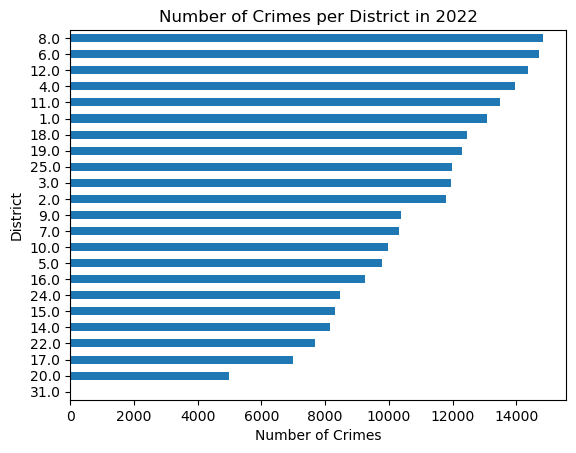

In [30]:
# Check the district with the most and least crimes in 2022
ax1 = df_res_1.loc[: ,'2022'].sort_values().plot(kind = 'barh')
ax1.set_title('Number of Crimes per District in 2022')
ax1.set_xlabel('Number of Crimes')

- ***District 31 has the least number of crimes, while District 8 has the most number.***

### 2) Crimes across the years: Is the total number of crimes increasing or decreasing across the years? Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [43]:
# Resample the dataframe
df_res_20 = df_dateindex.resample('Y').size().copy()

Text(0, 0.5, 'Number of crimes')

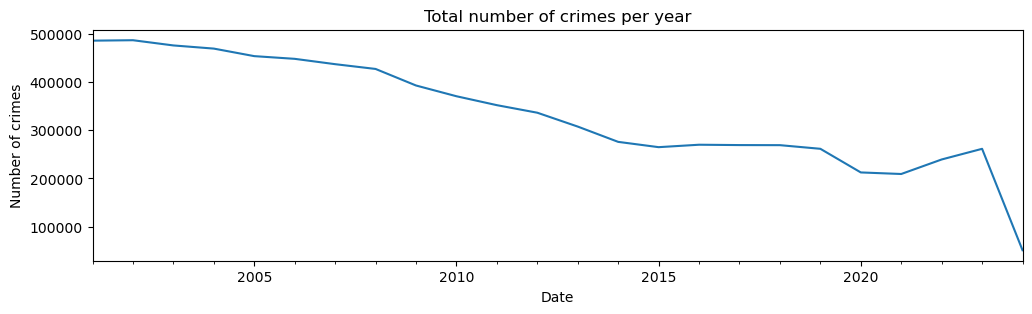

In [57]:
# Plot the total crimes per year
ax20 = df_res_20.plot(figsize = (12, 3))
ax20.set_title('Total number of crimes per year')
ax20.set_ylabel('Number of crimes')

- ***Overall, the number of crimes are decreasing year after year.***

In [49]:
# Resample the dataframe
df_res_21 = df_dateindex.groupby('Primary Type').resample('Y').size().copy()

In [50]:
df_res_21

Primary Type       Date      
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2020-12-31    8432
                   2021-12-31    8978
                   2022-12-31    8780
                   2023-12-31    8605
                   2024-12-31    1652
Length: 783, dtype: int64

In [53]:
# Unstack 'Primary Type' so we can plot all features at once
unstacked_21 = df_res_21.unstack(level=0).copy()
unstacked_21.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1011.0,31385.0,93464.0,26014.0,1.0,1776.0,55862.0,36.0,13241.0,14950.0,...,29664.0,6026.0,9.0,2750.0,8.0,18441.0,2238.0,204.0,99280.0,4278.0
2002-12-31,1032.0,31523.0,94153.0,25623.0,0.0,1804.0,55941.0,32.0,13880.0,13734.0,...,32601.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98334.0,4281.0
2003-12-31,955.0,29477.0,88380.0,25157.0,0.0,1570.0,55011.0,43.0,14807.0,13460.0,...,31148.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004-12-31,778.0,28850.0,87136.0,24564.0,0.0,1535.0,53164.0,45.0,15913.0,13257.0,...,29533.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95464.0,4298.0
2005-12-31,691.0,27067.0,83964.0,25503.0,0.0,1517.0,54548.0,41.0,16655.0,13592.0,...,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1817.0,192.0,85684.0,4106.0


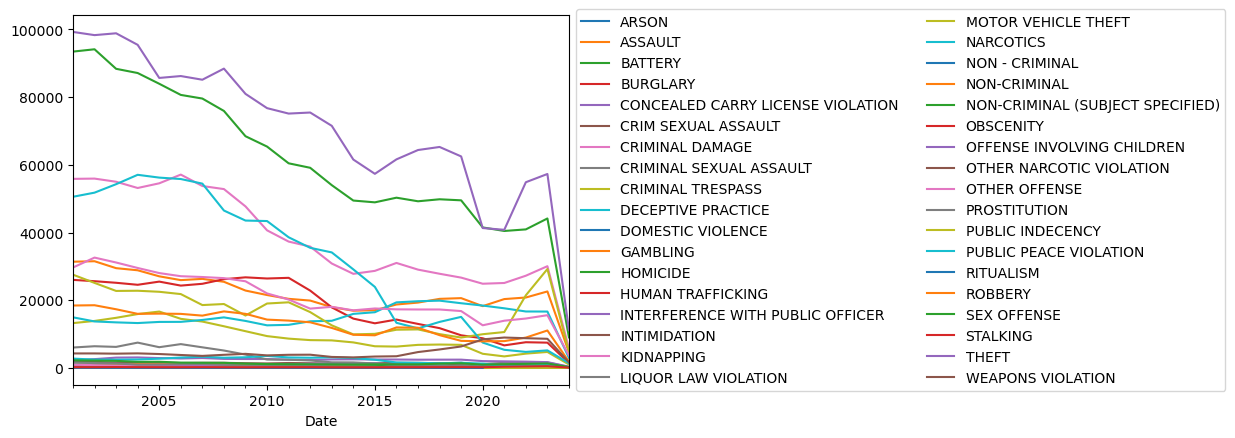

In [63]:
# Plot
ax21 = unstacked_21.plot()
# Put the legend to the right of the current axis
ax21.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2)

- ***All types of crimes generally decreased from 2001 to 2024.***

### 3) Comparing Months: ​What months have the most crime? What months have the least?

In [97]:
# Regroup the dataframe
df_temp = df_dateindex.copy()
df_temp['Month'] = df_dateindex.index.month_name()
df_res_30 = df_temp.groupby('Month').size().copy()

Text(0, 0.5, 'Number of Crimes')

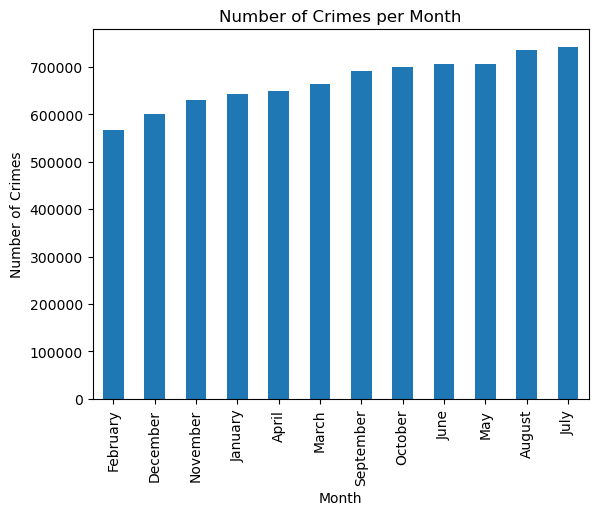

In [98]:
# Plot
ax30 = df_res_30.sort_values().plot(kind = 'bar')
ax30.set_title('Number of Crimes per Month')
ax30.set_ylabel('Number of Crimes')

- ***The month of February has the least number of crimes, while July has the most number.***

In [107]:
# Regroup the dataframe
df_res_31 = df_temp.groupby(['Primary Type', 'Month']).size().copy()

In [106]:
df_res_31

Primary Type       Month    
ARSON              April         1134
                   August        1216
                   December       971
                   February       870
                   January       1006
                                ...  
WEAPONS VIOLATION  March         9207
                   May          10757
                   November      8607
                   October       9869
                   September    10157
Length: 415, dtype: int64

In [145]:
# Unstack 'Primary Type' so we can plot all features at once
unstacked_31 = df_res_31.unstack(level=0).copy()
unstacked_31.head(12)

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Month,,,,,,,,,,,,,,,,,,,,,
April,1134.0,43843.0,122115.0,31970.0,90.0,2126.0,77539.0,572.0,18099.0,29269.0,...,42867.0,6039.0,13.0,4423.0,1.0,21661.0,2379.0,433.0,130012.0,9096.0
August,1216.0,48575.0,132793.0,41247.0,119.0,2586.0,84470.0,753.0,18971.0,30754.0,...,42397.0,6297.0,25.0,4486.0,3.0,28609.0,3030.0,452.0,164359.0,10690.0
December,971.0,36110.0,101891.0,36256.0,83.0,1844.0,65578.0,590.0,16185.0,31337.0,...,36398.0,4356.0,15.0,3248.0,3.0,26745.0,2028.0,369.0,131679.0,7955.0
February,870.0,36635.0,100112.0,26724.0,92.0,1890.0,59533.0,669.0,17442.0,27964.0,...,41221.0,5700.0,17.0,3545.0,1.0,18527.0,2215.0,367.0,113016.0,7684.0
January,1006.0,38235.0,107754.0,33865.0,97.0,2571.0,67065.0,805.0,19235.0,33107.0,...,44891.0,6454.0,8.0,3598.0,3.0,25034.0,2922.0,459.0,132096.0,9293.0
July,1395.0,49948.0,141032.0,39914.0,116.0,2671.0,86361.0,781.0,18425.0,29993.0,...,42907.0,5900.0,13.0,4785.0,1.0,28250.0,3195.0,489.0,164249.0,10670.0
June,1285.0,49291.0,139785.0,36558.0,111.0,2502.0,81562.0,757.0,17856.0,29710.0,...,42016.0,5601.0,22.0,5053.0,NaN,25190.0,3034.0,454.0,148500.0,10191.0
March,1160.0,44635.0,123576.0,30999.0,101.0,2108.0,75650.0,693.0,19422.0,30882.0,...,45465.0,6163.0,9.0,4793.0,3.0,21332.0,2528.0,467.0,130815.0,9207.0
May,1285.0,50472.0,139640.0,36675.0,105.0,2397.0,82275.0,697.0,18768.0,29018.0,...,43474.0,6094.0,24.0,5576.0,1.0,24482.0,2935.0,434.0,142244.0,10757.0


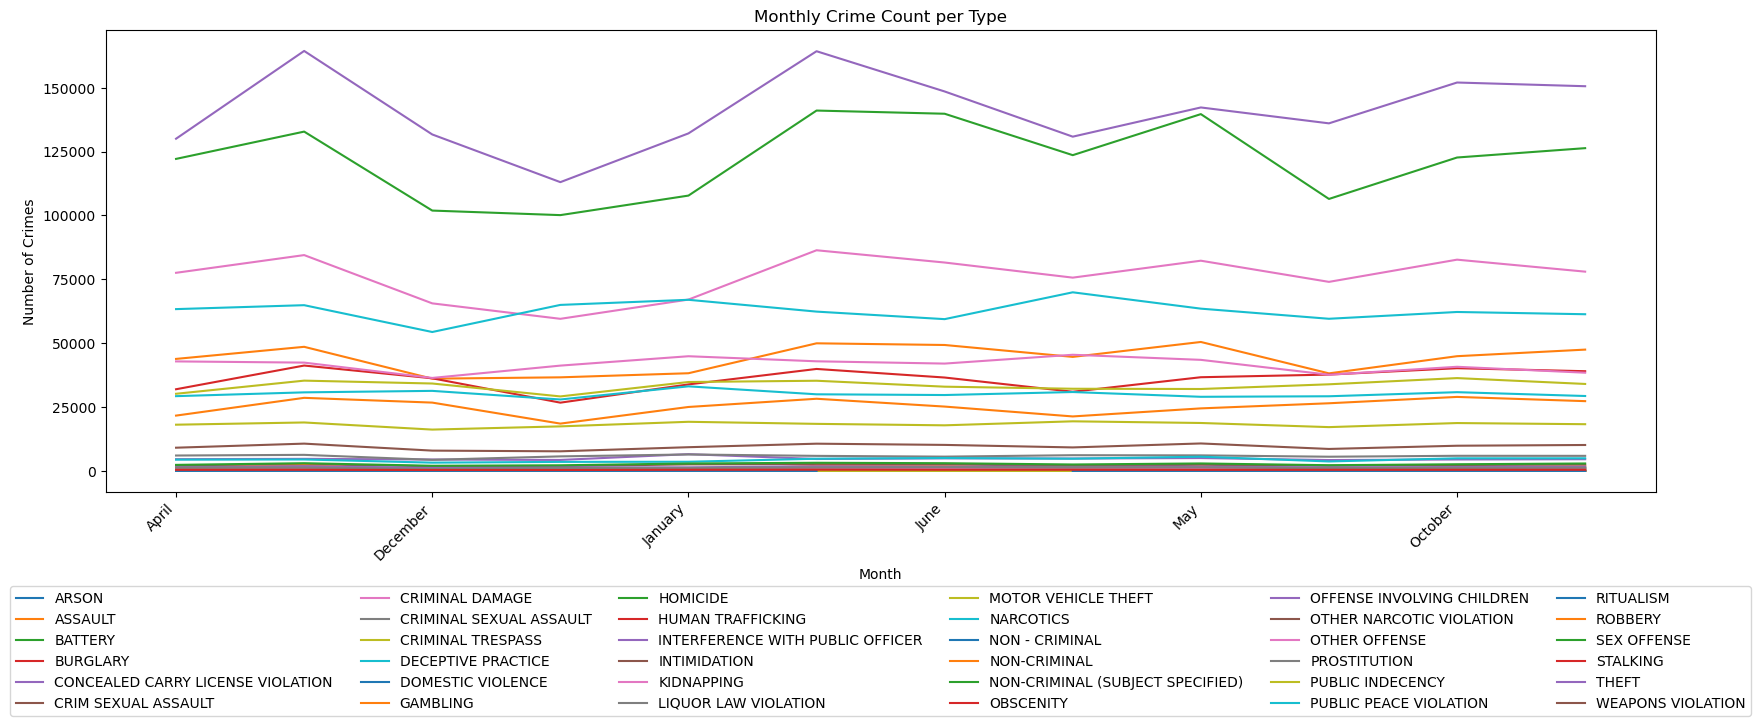

In [141]:
# Plot
ax31 = unstacked_31.plot(figsize = (20, 6))
# Put the legend to the right of the current axis
ax31.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol = 6);
ax31.set_title('Monthly Crime Count per Type')
ax31.set_ylabel('Number of Crimes')
ax31.set_xticklabels(ax31.get_xticklabels(), rotation=45, ha='right');

- ***In most crime types, the month of February still has the least number of crimes, while July still has the most number.***